In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import seaborn as sns

Let's understand the steps in the OSEMN pipeline in a little more detail:
1. Obtaining the data, which can be from any source: structured, unstructured, or
semi-structured.  
2. Scrubbing the data, which means getting your hands dirty and cleaning the data,
which can involve renaming columns and imputing missing values.  
3. Exploring the data to find out the relationships between each of the variables.
This means searching for any correlation among the variables and finding the
relationship between the explanatory variables and the response variable.  
4. Modeling the data, which can include prediction, forecasting, and clustering.  
5. INterpreting the data, which is combining all the analyses and results to draw
a conclusion.  

You work at a multinational bank that is aiming to increase its market share in
Europe. Recently, the number of customers using banking services has declined,
and the bank is worried that existing customers have stopped using them as their
main bank. As a data scientist, you are tasked with finding out the reasons behind
customer churn and predicting future customer churn. The marketing team is
interested in your findings and wants to better understand existing customer
behavior and possibly predict future customer churn. Your results will help the
marketing team to use their budget wisely to target potential churners.

In [6]:
df = pd.read_csv('Telco_Churn_Data.csv')

In [7]:
df.head(
    
)

,Target Churn,Target Code,Current Bill Amt,Avg Calls,Avg Calls Weekdays,Account Age,Percent Increase MOM,Acct Plan Subtype,Complaint Code,Avg Days Delinquent,Current TechSupComplaints,Current Days OpenWorkOrders,Equipment Age,Condition of Current Handset,Avg Hours WorkOrderOpenned
0,No Churn,0,14210,17950.000000,30297.0000,24,-0.334193,Gold,Billing Problem,6.2,0,0.0,8,1.0,0.0
1,Churn,1,14407,0.000000,0.0000,28,0.000000,Silver,Moving,1.0,0,0.0,17,1.0,0.0
2,Churn,1,12712,204.666667,10393.6667,23,0.000000,Gold,Billing Problem,17.6,0,0.0,23,1.0,0.0
3,No Churn,0,13807,15490.333300,41256.3333,39,0.148986,Silver,Billing Problem,0.0,0,0.0,17,1.0,0.0
4,No Churn,0,3805,5075.000000,12333.3333,23,-0.686047,Gold,Billing Problem,3.8,0,0.0,10,1.0,0.0


In [9]:
df.shape

(4708, 15)

In [14]:
df.columns = [column.replace(' ', '_') for column in df.columns]
df.rename(columns = {'Avg_Hours_WorkOrderOpenned':'Avg_Hours_WorkOrderOpened'}, inplace = True)

In [15]:
for i in ['Target_Code', 'Condition_of_Current_Handset', 'Current_TechSupComplaints']:
    df[i] = df[i].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Target_Churn                  4708 non-null   object  
 1   Target_Code                   4708 non-null   category
 2   Current_Bill_Amt              4708 non-null   int64   
 3   Avg_Calls                     4708 non-null   float64 
 4   Avg_Calls_Weekdays            4708 non-null   float64 
 5   Account_Age                   4708 non-null   int64   
 6   Percent_Increase_MOM          4708 non-null   float64 
 7   Acct_Plan_Subtype             4708 non-null   object  
 8   Complaint_Code                4701 non-null   object  
 9   Avg_Days_Delinquent           4708 non-null   float64 
 10  Current_TechSupComplaints     4708 non-null   category
 11  Current_Days_OpenWorkOrders   4708 non-null   float64 
 12  Equipment_Age                 4708 non-null   in

In [18]:
df.isna().sum()

Target_Churn                      0
Target_Code                       0
Current_Bill_Amt                  0
Avg_Calls                         0
Avg_Calls_Weekdays                0
Account_Age                       0
Percent_Increase_MOM              0
Acct_Plan_Subtype                 0
Complaint_Code                    7
Avg_Days_Delinquent               0
Current_TechSupComplaints         0
Current_Days_OpenWorkOrders       0
Equipment_Age                     0
Condition_of_Current_Handset    444
Avg_Hours_WorkOrderOpened         0
dtype: int64

In [20]:
df['Condition_of_Current_Handset'].value_counts()

1.0    4186
2.0      74
3.0       4
Name: Condition_of_Current_Handset, dtype: int64

In [22]:
df['Complaint_Code'].value_counts()

Billing Problem         2908
Call Quality            1070
Moving                   511
Check Account            195
Inaccurate Sales Inf      13
Pricing                    4
Name: Complaint_Code, dtype: int64

In [23]:
df['Complaint_Code'] = df['Complaint_Code'].fillna(value='Billing Problem')
df['Condition_of_Current_Handset'] = df['Condition_of_Current_Handset'].fillna(value=1)

<AxesSubplot:>

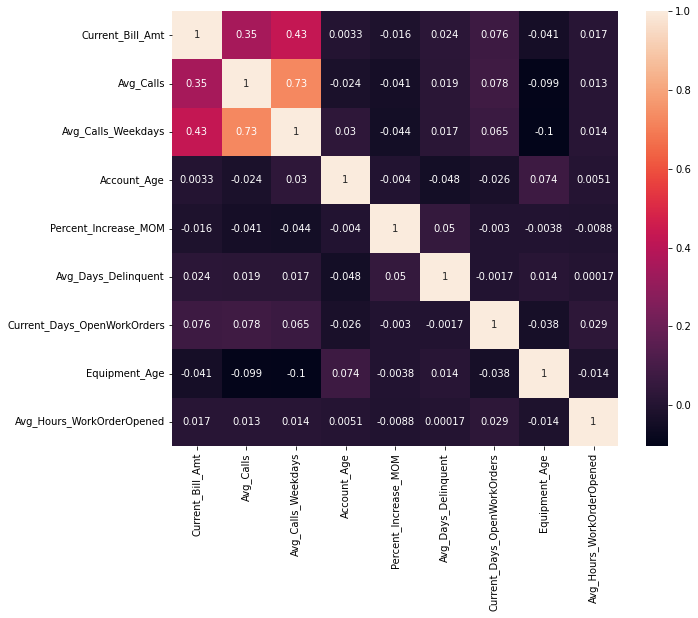

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

c:\Users\kshit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\kshit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\kshit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

Text(0, 0.5, 'No of Customers')

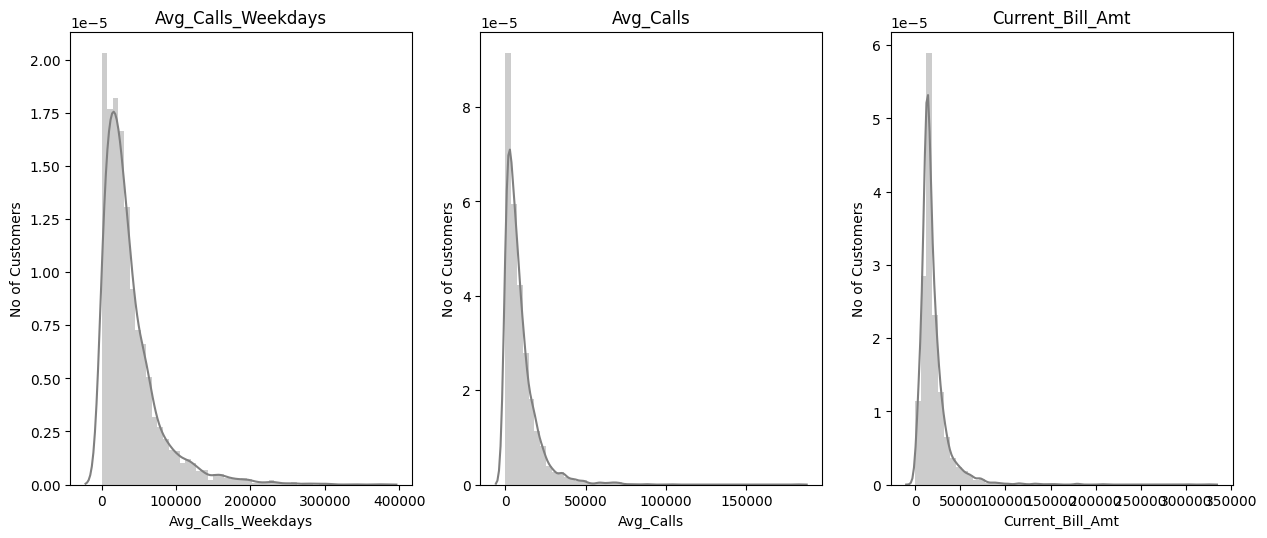

In [39]:
# plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.dpi"] = 100
f, axes = plt.subplots(ncols=3, figsize=(15, 6))
sns.distplot(df.Avg_Calls_Weekdays, kde=True, color="gray", ax=axes[0]).set_title('Avg_Calls_Weekdays')
axes[0].set_ylabel('No of Customers')
sns.distplot(df.Avg_Calls, kde=True, color="gray", ax=axes[1]).set_title('Avg_Calls')
axes[1].set_ylabel('No of Customers')
sns.distplot(df.Current_Bill_Amt, kde=True, color="gray", ax=axes[2]).set_title('Current_Bill_Amt')
axes[2].set_ylabel('No of Customers')

<AxesSubplot:xlabel='count', ylabel='Complaint_Code'>

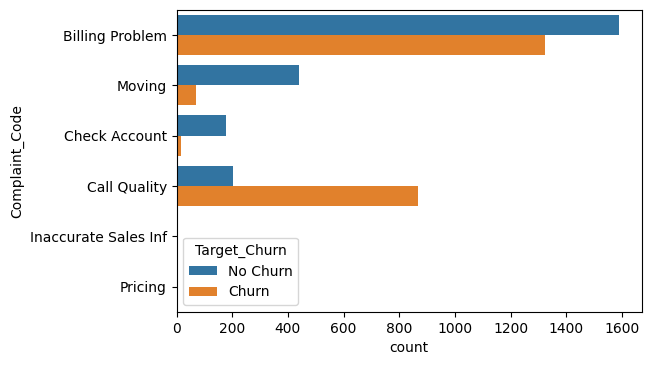

In [47]:
sns.countplot(y='Complaint_Code', hue='Target_Churn', data=df, )